In [ ]:
# Loading libraries

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('DM7_Association_bakery_75000.csv')

# Set a random seed for reproducibility
seed_value = 42
df_sampled = df.sample(frac=0.7, random_state=seed_value)

# Save the sampled data to a new CSV file
df_sampled.to_csv('DM7_Association_bakery_data.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#1.1 Load data sets

df = pd.read_csv("DM7_Association_bakery_data.csv")

# print and inspect the first few records
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ReceiptNum,Chocolate Cake,Lemon Cake,Casino Cake,Opera Cake,Strawberry Cake,Truffle Cake,Chocolate Eclair,Coffee Eclair,Vanilla Eclair,...,Lemon Lemonade,Raspberry Lemonade,Orange Juice,Green Tea,Bottled Water,Hot Coffee,Chocolate Coffee,Vanilla Frappucino,Cherry Soda,Single Espresso
0,26838,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2593,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,18360,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,73293,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,60128,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(df.columns.values)

['ReceiptNum' 'Chocolate Cake' 'Lemon Cake' 'Casino Cake' 'Opera Cake'
 ' Strawberry Cake' ' Truffle Cake' ' Chocolate Eclair' ' Coffee Eclair'
 ' Vanilla Eclair' ' Napolean Cake' ' Almond Tart' ' Apple Pie'
 ' Apple Tart' 'Apricot Tart' ' Berry Tart' ' Blackberry Tart'
 ' Blueberry Tart' ' Chocolate Tart' ' Cherry Tart' ' Lemon Tart'
 ' Pecan Tart' ' Ganache Cookie' ' Gongolais Cookie' ' Raspberry Cookie'
 ' Lemon Cookie' ' Chocolate Meringue' ' Vanilla Meringue'
 ' Marzipan Cookie' ' Tuile Cookie' ' Walnut Cookie' ' Almond Croissant'
 ' Apple Croissant' ' Apricot Croissant' ' Cheese Croissant'
 ' Chocolate Croissant' ' Apricot Danish' ' Apple Danish' ' Almond Twist'
 ' Almond Bear_Claw' ' Blueberry Danish' ' Lemon Lemonade'
 ' Raspberry Lemonade' ' Orange Juice' ' Green Tea' ' Bottled Water'
 ' Hot Coffee' ' Chocolate Coffee' ' Vanilla Frappucino' ' Cherry Soda'
 ' Single Espresso']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.isna().head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,ReceiptNum,Chocolate Cake,Lemon Cake,Casino Cake,Opera Cake,Strawberry Cake,Truffle Cake,Chocolate Eclair,Coffee Eclair,Vanilla Eclair,...,Lemon Lemonade,Raspberry Lemonade,Orange Juice,Green Tea,Bottled Water,Hot Coffee,Chocolate Coffee,Vanilla Frappucino,Cherry Soda,Single Espresso
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(52500, 51)

In [ ]:
#1.2(1) Finding unique items

items = (df.columns[1:].unique())
items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Chocolate Cake', 'Lemon Cake', 'Casino Cake', 'Opera Cake',
       ' Strawberry Cake', ' Truffle Cake', ' Chocolate Eclair',
       ' Coffee Eclair', ' Vanilla Eclair', ' Napolean Cake', ' Almond Tart',
       ' Apple Pie', ' Apple Tart', 'Apricot Tart', ' Berry Tart',
       ' Blackberry Tart', ' Blueberry Tart', ' Chocolate Tart',
       ' Cherry Tart', ' Lemon Tart', ' Pecan Tart', ' Ganache Cookie',
       ' Gongolais Cookie', ' Raspberry Cookie', ' Lemon Cookie',
       ' Chocolate Meringue', ' Vanilla Meringue', ' Marzipan Cookie',
       ' Tuile Cookie', ' Walnut Cookie', ' Almond Croissant',
       ' Apple Croissant', ' Apricot Croissant', ' Cheese Croissant',
       ' Chocolate Croissant', ' Apricot Danish', ' Apple Danish',
       ' Almond Twist', ' Almond Bear_Claw', ' Blueberry Danish',
       ' Lemon Lemonade', ' Raspberry Lemonade', ' Orange Juice', ' Green Tea',
       ' Bottled Water', ' Hot Coffee', ' Chocolate Coffee',
       ' Vanilla Frappucino', ' Cherry So

In [ ]:
#1.2(2) Remove extra space before column names

df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('_', ' ')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#df = df.astype(bool)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#1.3(2)
# Drop the ReceiptNum column
df = df.drop("ReceiptNum", axis=1)

# Obtain frequent itemsets with use_colnames=False
apriori(df,  min_support=0.03, use_colnames=False, max_len=None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.082933,(0)
1,0.084419,(1)
2,0.074552,(2)
3,0.081638,(3)
4,0.091657,(4)
...,...,...
72,0.030686,"(45, 37)"
73,0.033048,"(0, 2, 46)"
74,0.040914,"(35, 18, 3)"
75,0.034343,"(11, 37, 7)"


In [ ]:
# Obtain frequent itemsets with use_colnames=True
apriori(df,  min_support=0.03, use_colnames=True, max_len=None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.082933,(Chocolate Cake)
1,0.084419,(Lemon Cake)
2,0.074552,(Casino Cake)
3,0.081638,(Opera Cake)
4,0.091657,(Strawberry Cake)
...,...,...
72,0.030686,"(Almond Twist, Hot Coffee)"
73,0.033048,"(Chocolate Coffee, Casino Cake, Chocolate Cake)"
74,0.040914,"(Cherry Tart, Opera Cake, Apricot Danish)"
75,0.034343,"(Almond Twist, Apple Pie, Coffee Eclair)"


In [ ]:
#1.3(3)
# generate and save the frequent itemsets that meet a min support of 0.1% with column names in apriori()
frequent_itemsets = apriori(df,  min_support=0.01, use_colnames=True)

# print out the first few records in the frequent itemsets
frequent_itemsets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.082933,(Chocolate Cake)
1,0.084419,(Lemon Cake)
2,0.074552,(Casino Cake)
3,0.081638,(Opera Cake)
4,0.091657,(Strawberry Cake)


In [ ]:
#1.4

rules = association_rules(frequent_itemsets, "lift", min_threshold=6)

# print out the first few records in the frequent itemsets
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Chocolate Coffee),(Chocolate Cake),0.083067,0.082933,0.043714,0.526255,6.345524,0.036825,1.935783,0.918724
1,(Chocolate Cake),(Chocolate Coffee),0.082933,0.083067,0.043714,0.527102,6.345524,0.036825,1.938964,0.918590
2,(Almond Twist),(Apple Pie),0.077143,0.077352,0.036514,0.473333,6.119182,0.030547,1.751863,0.906510
3,(Apple Pie),(Almond Twist),0.077352,0.077143,0.036514,0.472051,6.119182,0.030547,1.748005,0.906716
4,(Apple Croissant),(Apple Tart),0.067771,0.068057,0.028343,0.418212,6.145020,0.023731,1.601861,0.898134


In [ ]:
rules.shape[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


290

In [ ]:
#1.5

rules = association_rules(frequent_itemsets, "confidence", min_threshold=0.6)

# print out the first few records in the frequent itemsets
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Chocolate Coffee, Casino Cake)",(Chocolate Cake),0.034914,0.082933,0.033048,0.946536,11.413212,0.030152,17.152890,0.945390
1,"(Chocolate Coffee, Chocolate Cake)",(Casino Cake),0.043714,0.074552,0.033048,0.755991,10.140404,0.029789,3.792683,0.942589
2,"(Casino Cake, Chocolate Cake)",(Chocolate Coffee),0.035276,0.083067,0.033048,0.936825,11.277990,0.030117,14.514193,0.944656
3,"(Cherry Tart, Opera Cake)",(Apricot Danish),0.043067,0.092362,0.040914,0.950022,10.285865,0.036937,18.160794,0.943409
4,"(Cherry Tart, Apricot Danish)",(Opera Cake),0.053238,0.081638,0.040914,0.768515,9.413684,0.036568,3.967267,0.944030


In [ ]:
#1.6

rules = association_rules(frequent_itemsets, "lift", min_threshold=0.9)

# print out the first few records in the frequent itemsets
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Casino Cake),(Chocolate Cake),0.074552,0.082933,0.035276,0.473173,5.705465,0.029093,1.740737,0.891168
1,(Chocolate Cake),(Casino Cake),0.082933,0.074552,0.035276,0.425356,5.705465,0.029093,1.610471,0.899312
2,(Chocolate Coffee),(Chocolate Cake),0.083067,0.082933,0.043714,0.526255,6.345524,0.036825,1.935783,0.918724
3,(Chocolate Cake),(Chocolate Coffee),0.082933,0.083067,0.043714,0.527102,6.345524,0.036825,1.938964,0.918590
4,(Lemon Tart),(Lemon Cake),0.075410,0.084419,0.036571,0.484971,5.744805,0.030205,1.777727,0.893292


In [ ]:
#1.7

rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
0,(Casino Cake),(Chocolate Cake),0.074552,0.082933,0.035276,0.473173,5.705465,0.029093,1.740737,0.891168,1
1,(Chocolate Cake),(Casino Cake),0.082933,0.074552,0.035276,0.425356,5.705465,0.029093,1.610471,0.899312,1
2,(Chocolate Coffee),(Chocolate Cake),0.083067,0.082933,0.043714,0.526255,6.345524,0.036825,1.935783,0.918724,1
3,(Chocolate Cake),(Chocolate Coffee),0.082933,0.083067,0.043714,0.527102,6.345524,0.036825,1.938964,0.918590,1
4,(Lemon Tart),(Lemon Cake),0.075410,0.084419,0.036571,0.484971,5.744805,0.030205,1.777727,0.893292,1
...,...,...,...,...,...,...,...,...,...,...,...
347,(Lemon Lemonade),"(Raspberry Lemonade, Green Tea, Lemon Cookie, ...",0.069238,0.020876,0.020876,0.301513,14.442916,0.019431,1.401778,1.000000,1
348,(Raspberry Cookie),"(Raspberry Lemonade, Green Tea, Lemon Lemonade...",0.067600,0.020876,0.020876,0.308819,14.792899,0.019465,1.416596,1.000000,1
349,(Green Tea),"(Raspberry Lemonade, Lemon Lemonade, Lemon Coo...",0.062571,0.025829,0.020876,0.333638,12.917391,0.019260,1.461925,0.984166,1
350,(Raspberry Lemonade),"(Green Tea, Lemon Lemonade, Lemon Cookie, Rasp...",0.067981,0.020876,0.020876,0.307089,14.710003,0.019457,1.413058,1.000000,1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv("DM7_Association_Online Retail.csv")

# Generate an 80% sample
df = df(frac=0.8, random_state=42)

# Display the first few rows of the sampled DataFrame
print(df.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       InvoiceNo StockCode                       Description  Quantity  \
209268    555200     71459    HANGING JAM JAR T-LIGHT HOLDER        24   
207108    554974     21128                GOLD FISHING GNOME         4   
167085    550972     21086       SET/6 RED SPOTTY PAPER CUPS         4   
471836    576652     22812  PACK 3 BOXES CHRISTMAS PANETTONE         3   
115865    546157     22180                    RETROSPOT LAMP         2   

             InvoiceDate  UnitPrice  CustomerID         Country  
209268    6/1/2011 12:05       0.85     17315.0  United Kingdom  
207108   5/27/2011 17:14       6.95     14031.0  United Kingdom  
167085   4/21/2011 17:05       0.65     14031.0  United Kingdom  
471836  11/16/2011 10:39       1.95     17198.0  United Kingdom  
115865    3/10/2011 8:40       9.95     13502.0  United Kingdom  


In [ ]:
print (df.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#2.3(2)

df['Description'] = df['Description'].str.strip()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#3(3)

df.dropna(axis = 0,subset=['InvoiceNo'], inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#3(4)

df['InvoiceNo'] = df['InvoiceNo'].astype('str')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#3(5)

df = df[~df['InvoiceNo'].str.contains('C')]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#2.4(1)

basket_fr_sets = (df[df['Country'] == "France"].pivot_table(index="InvoiceNo", columns="Description", values="Quantity", aggfunc="sum",fill_value=0))
basket_fr_sets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#4(2)

def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_fr = basket_fr_sets.applymap(encode_units)
basket_fr.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#4(3)

basket_fr = basket_fr.drop('POSTAGE', axis=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#4(4)

frequent_itemsets = apriori(basket_fr, min_support=0.01, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.030612,(10 COLOUR SPACEBOY PEN)
1,0.015306,(12 COLOURED PARTY BALLOONS)
2,0.015306,(12 PENCIL SMALL TUBE WOODLAND)
3,0.017857,(12 PENCILS SMALL TUBE RED RETROSPOT)
4,0.017857,(12 PENCILS SMALL TUBE SKULL)
...,...,...
29856,0.010204,"(ALARM CLOCK BAKELIKE GREEN, LUNCH BOX I LOVE ..."
29857,0.010204,"(ALARM CLOCK BAKELIKE GREEN, CHILDRENS CUTLERY..."
29858,0.010204,"(ALARM CLOCK BAKELIKE GREEN, CHILDRENS CUTLERY..."
29859,0.010204,"(CHILDRENS CUTLERY DOLLY GIRL, LUNCH BOX I LOV..."


In [ ]:
#4(5)

rules_fr = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules_fr.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(10 COLOUR SPACEBOY PEN),(SPACEBOY BIRTHDAY CARD),0.030612,0.071429,0.017857,0.583333,8.166667,0.015671,2.228571,0.905263
1,(12 COLOURED PARTY BALLOONS),(PACK OF 6 SKULL PAPER PLATES),0.015306,0.056122,0.010204,0.666667,11.878788,0.009345,2.831633,0.930052
2,(12 COLOURED PARTY BALLOONS),(SET OF 9 BLACK SKULL BALLOONS),0.015306,0.066327,0.012755,0.833333,12.564103,0.011740,5.602041,0.934715
3,(12 COLOURED PARTY BALLOONS),(SET/6 RED SPOTTY PAPER CUPS),0.015306,0.137755,0.010204,0.666667,4.839506,0.008096,2.586735,0.805699
4,(12 COLOURED PARTY BALLOONS),(SET/6 RED SPOTTY PAPER PLATES),0.015306,0.127551,0.010204,0.666667,5.226667,0.008252,2.617347,0.821244


In [ ]:
rules_fr = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_fr.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CARD DOLLY GIRL),(10 COLOUR SPACEBOY PEN),0.030612,0.030612,0.010204,0.333333,10.888889,0.009267,1.454082,0.936842
1,(10 COLOUR SPACEBOY PEN),(CARD DOLLY GIRL),0.030612,0.030612,0.010204,0.333333,10.888889,0.009267,1.454082,0.936842
2,(CHARLOTTE BAG SUKI DESIGN),(10 COLOUR SPACEBOY PEN),0.043367,0.030612,0.010204,0.235294,7.686275,0.008877,1.267661,0.909333
3,(10 COLOUR SPACEBOY PEN),(CHARLOTTE BAG SUKI DESIGN),0.030612,0.043367,0.010204,0.333333,7.686275,0.008877,1.434949,0.897368
4,(ICE CREAM SUNDAE LIP GLOSS),(10 COLOUR SPACEBOY PEN),0.045918,0.030612,0.010204,0.222222,7.259259,0.008798,1.246356,0.903743


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Confidence Distribution of Rules')

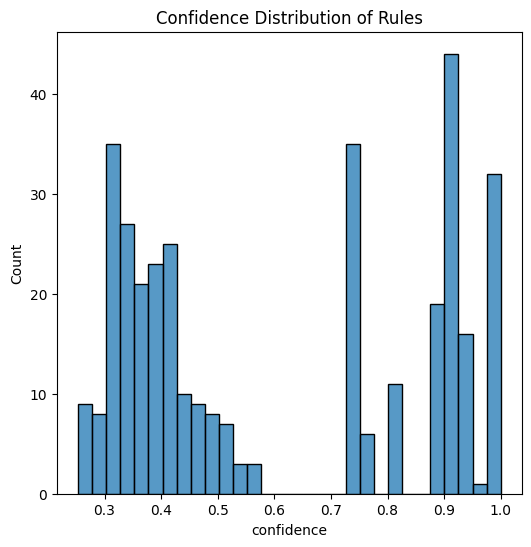

In [ ]:
#4(6)

import matplotlib.pyplot as plt
import seaborn as sns

# set the figure size
plt.figure(figsize=(6,6))

# use histplot with "confidence" as x, rules as data as arguments
sns.histplot(x="confidence", data=rules, bins=30)

# add title
plt.title('Confidence Distribution of Rules')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Lift Distribution of Rules')

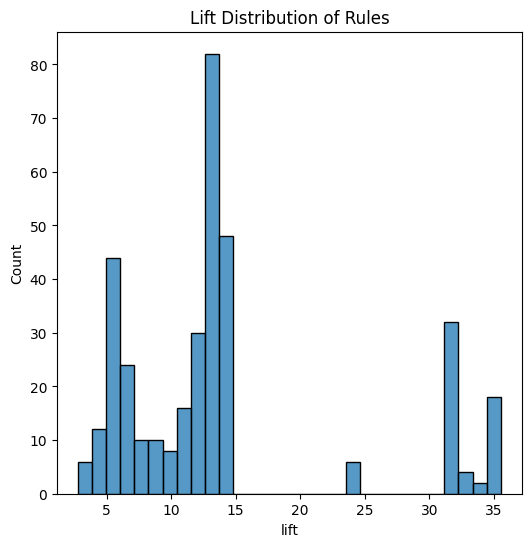

In [ ]:
plt.figure(figsize=(6,6))

# use histplot with "lift" as x, rules as data as arguments
sns.histplot(x="lift", data=rules, bins=30)

# add title
plt.title('Lift Distribution of Rules')

In [ ]:
#4(7)

rules_fr[ (rules_fr['lift'] >= 6) &
       (rules_fr['confidence'] >= 0.8)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(12 COLOURED PARTY BALLOONS),(SET OF 9 BLACK SKULL BALLOONS),0.015306,0.066327,0.012755,0.833333,12.564103,0.011740,5.602041,0.934715
48,(12 PENCILS TALL TUBE WOODLAND),(12 PENCILS TALL TUBE RED RETROSPOT),0.015306,0.022959,0.012755,0.833333,36.296296,0.012404,5.862245,0.987565
68,(36 PENCILS TUBE WOODLAND),(36 PENCILS TUBE RED RETROSPOT),0.022959,0.045918,0.020408,0.888889,19.358025,0.019354,8.586735,0.970627
143,(BINGO SET),(4 TRADITIONAL SPINNING TOPS),0.010204,0.071429,0.010204,1.000000,14.000000,0.009475,inf,0.938144
263,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE PINK),0.028061,0.102041,0.022959,0.818182,8.018182,0.020096,4.938776,0.900554
...,...,...,...,...,...,...,...,...,...,...
1139920,"(DOLLY GIRL CHILDRENS CUP, SKULL LUNCH BOX WIT...","(ALARM CLOCK BAKELIKE GREEN, CHILDRENS CUTLERY...",0.010204,0.010204,0.010204,1.000000,98.000000,0.010100,inf,1.000000
1139924,"(SKULL LUNCH BOX WITH CUTLERY, JUMBO BAG APPLES)","(ALARM CLOCK BAKELIKE GREEN, CHILDRENS CUTLERY...",0.010204,0.010204,0.010204,1.000000,98.000000,0.010100,inf,1.000000
1139929,"(DOLLY GIRL CHILDRENS CUP, ALARM CLOCK BAKELIK...","(ALARM CLOCK BAKELIKE GREEN, CHILDRENS CUTLERY...",0.010204,0.010204,0.010204,1.000000,98.000000,0.010100,inf,1.000000
1139931,"(DOLLY GIRL CHILDRENS CUP, JUMBO BAG APPLES)","(ALARM CLOCK BAKELIKE GREEN, CHILDRENS CUTLERY...",0.010204,0.010204,0.010204,1.000000,98.000000,0.010100,inf,1.000000


In [ ]:
#4(9)

basket_fr['ALARM CLOCK BAKELIKE PINK'].sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


40

In [ ]:
basket_fr['ALARM CLOCK BAKELIKE RED'].sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


37

In [ ]:
basket_fr[['ALARM CLOCK BAKELIKE PINK', 'ALARM CLOCK BAKELIKE RED']].groupby(['ALARM CLOCK BAKELIKE PINK']).sum().sort_values(by='ALARM CLOCK BAKELIKE PINK')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,ALARM CLOCK BAKELIKE RED
ALARM CLOCK BAKELIKE PINK,
0,8
1,29


In [ ]:
#4.5

basket_fr_sets = (df[df['Country'] == "Germany"].pivot_table(index="InvoiceNo", columns="Description", values="Quantity", aggfunc="sum",fill_value=0))
basket_fr_sets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
frequent_itemsets = apriori(basket_fr, min_support=0.06, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.071429,(4 TRADITIONAL SPINNING TOPS)
1,0.096939,(ALARM CLOCK BAKELIKE GREEN)
2,0.102041,(ALARM CLOCK BAKELIKE PINK)
3,0.094388,(ALARM CLOCK BAKELIKE RED)
4,0.068878,(ASSORTED COLOUR MINI CASES)
...,...,...
73,0.102041,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET..."
74,0.122449,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT..."
75,0.063776,"(ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI..."
76,0.068878,"(PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TI..."


In [ ]:
rules_fr = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.06)
rules_fr.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859,0.964734
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383,0.959283
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181,0.979224
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878,0.976465
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135,0.968652


In [ ]:
#4.6

basket_fr_sets = (df[df['Country'] == "United Kingdom"].pivot_table(index="InvoiceNo", columns="Description", values="Quantity", aggfunc="sum",fill_value=0))
basket_fr_sets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
frequent_itemsets = apriori(basket_fr, min_support=0.07, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.071429,(4 TRADITIONAL SPINNING TOPS)
1,0.096939,(ALARM CLOCK BAKELIKE GREEN)
2,0.102041,(ALARM CLOCK BAKELIKE PINK)
3,0.094388,(ALARM CLOCK BAKELIKE RED)
4,0.081633,(BAKING SET 9 PIECE RETROSPOT)
5,0.071429,(CHILDRENS CUTLERY DOLLY GIRL)
6,0.099490,(DOLLY GIRL LUNCH BOX)
7,0.096939,(JUMBO BAG RED RETROSPOT)
8,0.076531,(JUMBO BAG WOODLAND ANIMALS)
9,0.125000,(LUNCH BAG APPLE DESIGN)


In [ ]:
rules_fr = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.06)
rules_fr.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859,0.964734
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383,0.959283
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181,0.979224
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878,0.976465
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135,0.968652


In [ ]:
#4.9(1)

basket_fr_cid = (df[df['Country'] == "France"].pivot_table(index="CustomerID", columns="Description", values="Quantity", aggfunc="sum",fill_value=0))
basket_fr_cid.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
CustomerID,,,,,,,,,,,,,,,,,,,,,
12413.0,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12437.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12441.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12488.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12489.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
basket_fr_cid.dropna(inplace=True) # remove missing values in CustomerID
basket_fr_cid = basket_fr_cid.astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#9(2)

def encode_units(x):
    if x <= 0:
        return 0
    else:
        return 1

basket_fr_sets = basket_fr_cid.applymap(encode_units)
basket_fr_sets = basket_fr_cid.drop('POSTAGE', axis=1)
basket_fr_sets.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
CustomerID,,,,,,,,,,,,,,,,,,,,,
12413.0,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12437.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12441.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12488.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12489.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#9(3)

frequent_itemsets = apriori(basket_fr, min_support=0.03, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.030612,(10 COLOUR SPACEBOY PEN)
1,0.035714,(3 PIECE SPACEBOY COOKIE CUTTER SET)
2,0.045918,(36 PENCILS TUBE RED RETROSPOT)
3,0.071429,(4 TRADITIONAL SPINNING TOPS)
4,0.096939,(ALARM CLOCK BAKELIKE GREEN)
...,...,...
482,0.033163,"(PACK OF 6 SKULL PAPER PLATES, SET/6 RED SPOTT..."
483,0.030612,"(ROUND SNACK BOXES SET OF4 WOODLAND, PLASTERS ..."
484,0.030612,"(PACK OF 20 SKULL PAPER NAPKINS, SET/6 RED SPO..."
485,0.030612,"(PACK OF 20 SKULL PAPER NAPKINS, SET/20 RED RE..."


In [ ]:
rules_fr[ (rules_fr['lift'] >= 6) &
        (rules_fr['confidence'] >= 0.01)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859,0.964734
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383,0.959283
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181,0.979224
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878,0.976465
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135,0.968652
5,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061,0.960466
16,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735,0.956140
17,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER PLATES),0.132653,0.127551,0.102041,0.769231,6.030769,0.085121,3.780612,0.961765
18,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122,0.981725
19,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041,0.993343


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
